
<div style="text-align: center; font-size: 40px; text-align: center; color: Red; ">
    NETFLIX PROJECT
</div>


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [11]:
df = pd.read_csv(r"C:\Users\rahul\Downloads\netflix1.csv")
df.head(1)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries


In [15]:
# Describing Data it's  count ,mode ,min , max.
df.describe().T
#df.describe(include = "object").T

,count,mean,std,min,25%,50%,75%,max
release_year,8790.0,2014.183163,8.825466,1925.0,2013.0,2017.0,2019.0,2021.0


In [4]:
df.describe(include= "object").T    

,count,unique,top,freq
show_id,8790,8790,s1,1
type,8790,2,Movie,6126
title,8790,8787,9-Feb,2
director,8790,4528,Not Given,2588
country,8790,86,United States,3240
date_added,8790,1713,1/1/2020,110
rating,8790,14,TV-MA,3205
duration,8790,220,1 Season,1791
listed_in,8790,513,"Dramas, International Movies",362


In [14]:
# Information of Data .
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


<h2 style="text-align: center; font-size: 40px; text-align: center; color: Red;"> Data Cleaning </h2>

In [6]:
# TO knowing the shape of Data 
df.shape

(8790, 10)

In [7]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [10]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [16]:
# Drop rows with missing critical information
df.dropna(subset=['director','country'] ,inplace = True)
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [18]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [20]:
 print(df.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [21]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV



<div style="text-align: center; font-size: 40px; text-align: center; color: Red; ">
    Data Visualization 
</div>


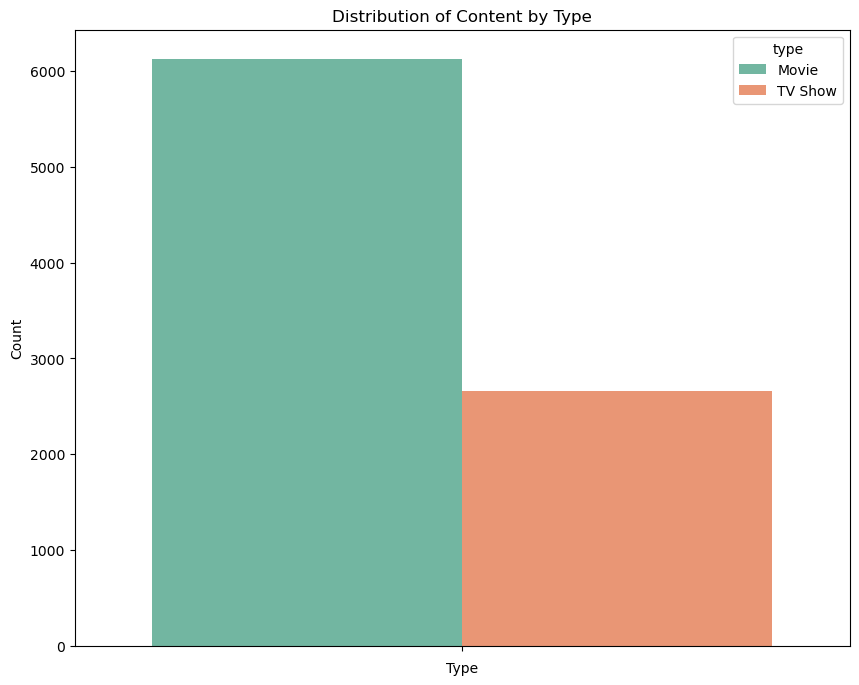

In [25]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(hue=type_counts.index,y=type_counts.values,palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [27]:
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


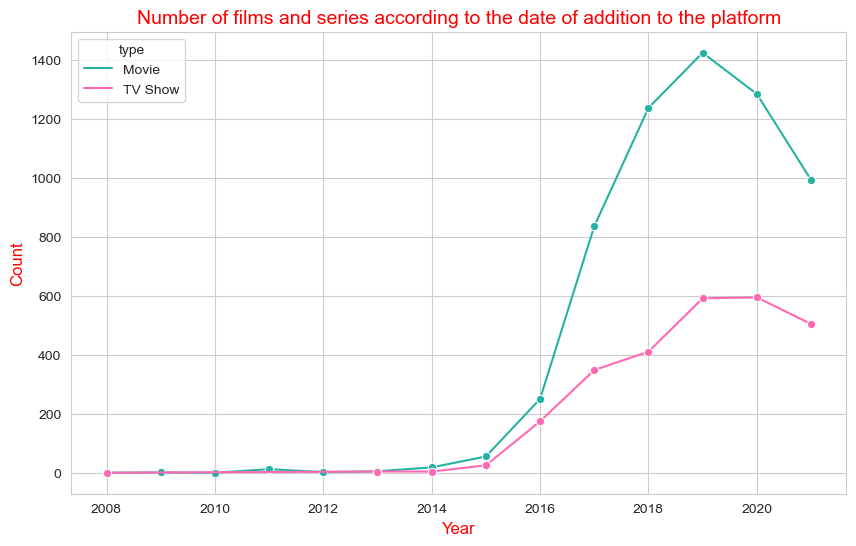

In [76]:
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce') 

df['year'] = df['date_added'].dt.year.fillna(0).astype(int)
df['month'] = df['date_added'].dt.month.fillna(0).astype(int)
df['day'] = df['date_added'].dt.day.fillna(0).astype(int)

df_grouped = df[df.year > 0].groupby(['year', 'type']).size().reset_index(name='count').sort_values("year")
df_grouped
color_list = ["#26b2a3", "hotpink"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='year', y='count', hue='type', marker='o', palette=color_list)

plt.title('Number of films and series according to the date of addition to the platform', color= 'red',fontsize=14)
plt.xlabel('Year', color= 'red', fontsize=12)
plt.ylabel('Count', color= 'red', fontsize=12)
plt.grid(True)
plt.show()

Text(0.5, 0.98, 'Total Contenton Netflix')

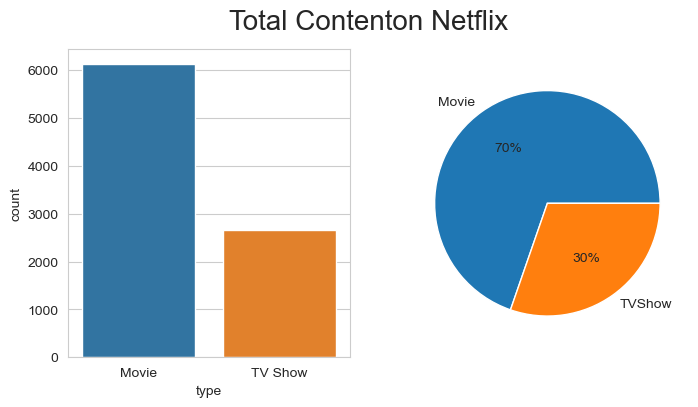

In [71]:
freq=df['type'].value_counts()
fig,axes=plt.subplots(1,2,figsize=(8,4))
sns.countplot(df,x=df['type'],ax=axes[0])
plt.pie(freq,labels=['Movie','TVShow'],autopct='%.0f%%')
plt.suptitle('Total Contenton Netflix',fontsize=20)

In [29]:
# Split the 'listed_in' column and count genres
df['genres'] = df['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)


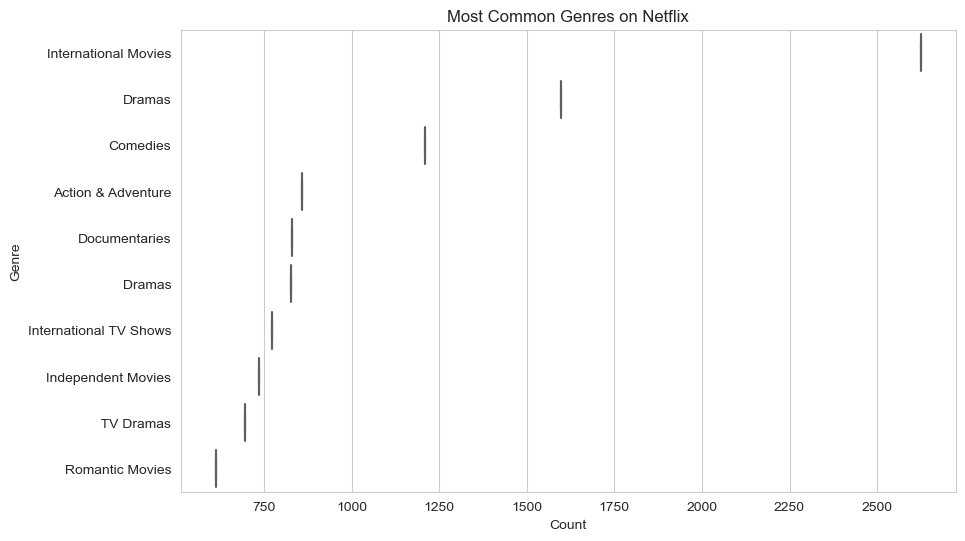

In [74]:
# plot 
plt.figure(figsize = (10,6))
sns.boxplot(x =genre_counts.values , y = genre_counts.index , palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

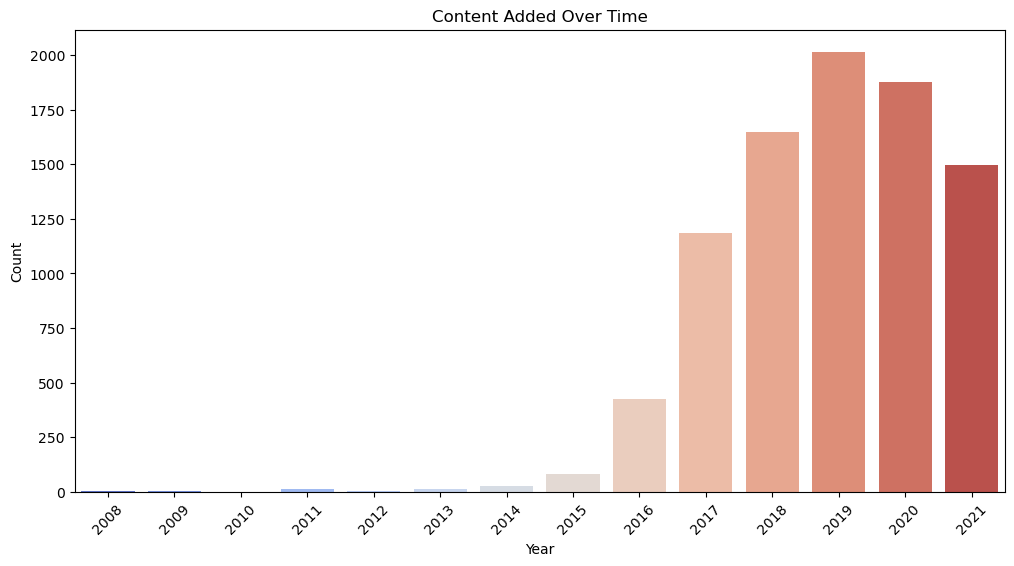

In [34]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

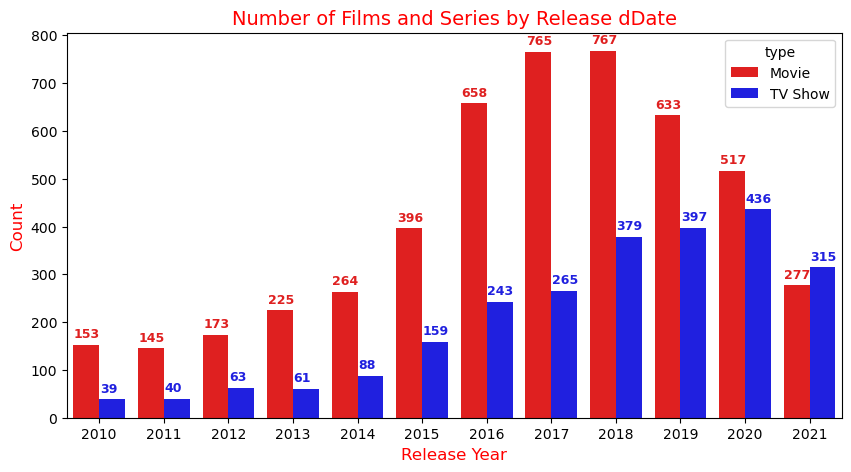

In [36]:
fig, ax = plt.subplots(figsize = (10, 5))

ax = sns.countplot(x = "release_year", hue = "type", data = df[df.release_year >= 2010], palette=["red", "blue"])

plt.title('Number of Films and Series by Release dDate', color='red', fontsize=14)

for p in ax.patches:
    bar_color = p.get_facecolor()

    ax.annotate(f"{int(p.get_height())}", (p.get_x() + 0.01, p.get_height() + 15), fontsize=9, color=bar_color, fontweight='bold')
plt.xlabel('Release Year', color='red', fontsize=12)
plt.ylabel('Count', color='red', fontsize=12)
plt.show()

In [39]:
df['season'] = df['release_year'].apply(lambda x: 
                                 "winter" if x in [12, 1, 2] else 
                                 "spring" if x in [3, 4, 5] else 
                                 "summer" if x in [6, 7, 8] else 
                                 "autumn")

df.season.value_counts()

autumn    8790
Name: season, dtype: int64

In [49]:
# Top 5 Actors Who Starred in the Most Movies or TV Shows
director = df["director"].str.split(", ", expand=True).stack().value_counts()[1:6]
director

Rajiv Chilaka          23
Jan Suter              21
Raúl Campos            19
Alastair Fothergill    19
Marcus Raboy           16
dtype: int64

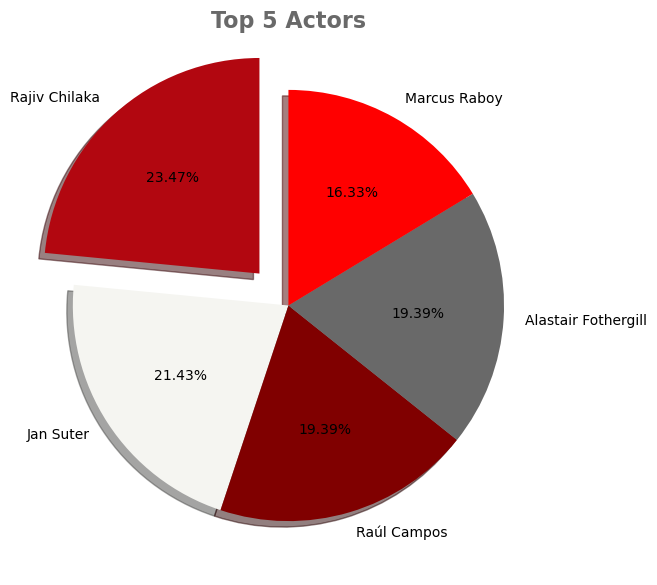

In [43]:
# top 5 director visualize by Pie-Chart.
fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(director.values, labels=director.index, autopct='%1.2f%%',
       startangle=90,
       shadow= 0.2,
       colors= ['#b20710', '#f5f5f1', "maroon", "dimgray", "red"],
       explode= (0.2, 0, 0, 0, 0),
       textprops={'color': 'black'}
      )

ax.set_title('Top 5 Actors', fontsize=16, fontweight='bold', color= 'dimgrey')

plt.show()

In [77]:
df.head(1)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,month_added,season,year,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021,9,autumn,2021,9,25


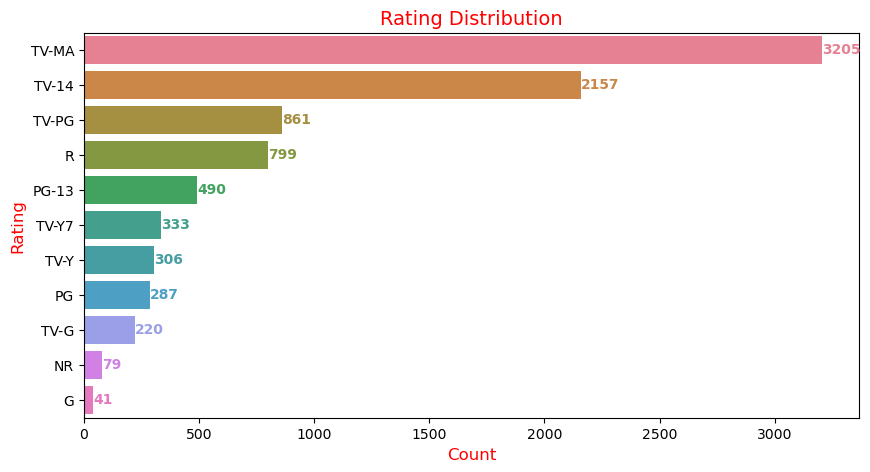

In [51]:
# Rating Distribution
order = df['rating'].value_counts().head(11).index

fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(data = df, y = "rating", palette = "husl", order = order)

plt.title('Rating Distribution', color='red', fontsize=14)

for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width() + 1, p.get_y() + 0.5), fontsize=10, color=p.get_facecolor(), fontweight='bold')
plt.ylabel('Rating', color='red', fontsize=12)
plt.xlabel('Count', color='red', fontsize=12)
plt.show()

In [52]:
country_distribution = df['country'].str.split(', ', expand=True).stack().value_counts()

# Filtering: Only countries with more than a certain number of movies
country_distribution = country_distribution[country_distribution > 10]

country_distribution.reset_index()

,index,0
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


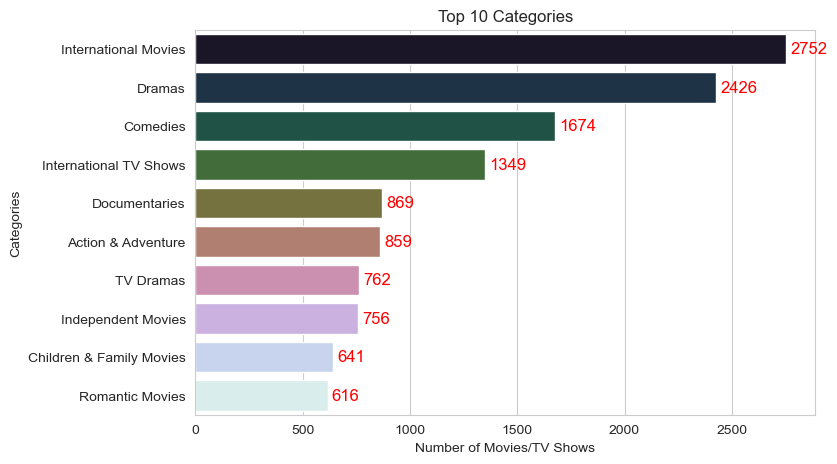

In [53]:
# Top 10 Categories
top_categories = df['listed_in'].str.split(',', expand=True).stack().str.strip().value_counts()[:10]
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.barplot(x=top_categories.values, y=top_categories.index, palette="cubehelix")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='red', padding=3)

ax.set(xlabel='Number of Movies/TV Shows', ylabel='Categories')
plt.title("Top 10 Categories")

plt.show()

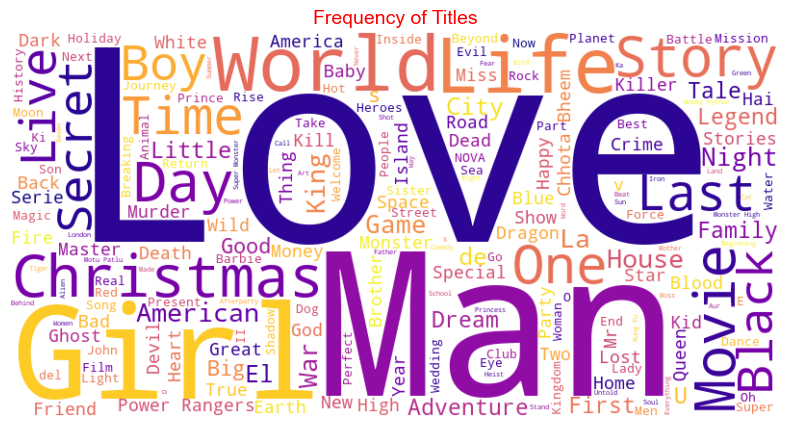

In [58]:
 # Generate word cloud
title_text = ' '.join(df[df.type != "Unknown"].title)
title_text
# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(title_text)

# Adjust the chart propertie
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequency of Titles', color='red', fontsize= 14)
plt.show()
